In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle

In [312]:
class MeasurementData():
  def __init__(self,df,GTDist,GTAngle):
    self.df=df
    self.GTDist=GTDist
    self.GTAngle=GTAngle



    self.meanDist=self.df["distance"].mean()
    self.maxDist=self.df["distance"].max()
    self.minDist=self.df["distance"].min()

    self.meanX=self.df["x-coord"].mean()
    self.maxX=self.df["x-coord"].max()
    self.minX=self.df["x-coord"].min()
    self.GTx=np.cos(np.radians(self.GTAngle))*self.GTDist
    self.GTy=np.sin(np.radians(self.GTAngle))*self.GTDist

    self.meanY=self.df["y-coord"].mean()
    self.maxY=self.df["y-coord"].max()
    self.minY=self.df["y-coord"].min()

    self.meanHz=self.df["framerate"].mean()
    self.maxHz=self.df["framerate"].max()
    self.minHz=self.df["framerate"].min()

    self.df["angle-degrees"]=np.degrees(self.df["angle"])
    self.df["angles-alligned"]= self.df["angle-degrees"]+2.0661309933057557
    self.df["x-alligned"]= np.multiply(np.cos(np.radians(self.df["angles-alligned"])),self.df["distance"])
    self.df["y-alligned"]= np.multiply(np.sin(np.radians(self.df["angles-alligned"])),self.df["distance"])

    self.meanXalligned=self.df["x-alligned"].mean()
    self.maxXalligned=self.df["x-alligned"].max()
    self.minXalligned=self.df["x-alligned"].min()

    self.meanYalligned=self.df["y-alligned"].mean()
    self.maxYalligned=self.df["y-alligned"].max()
    self.minYalligned=self.df["y-alligned"].min()

    self.meanAngle=self.df["angle-degrees"].mean()
    self.maxAngle=self.df["angle-degrees"].max()
    self.minAngle=self.df["angle-degrees"].min()

    self.missingAmount=(500-self.df["detection"].sum())/500


In [313]:
def addData(name,GTDist):
    
    if GTDist==3:
        createInstance(pd.read_csv(name + "-20deg" + ".csv"),GTDist,-20)
        #createInstance(pd.read_csv(name + "-15deg" + ".csv"),GTDist,-15)
        createInstance(pd.read_csv(name + "-10deg" + ".csv"),GTDist,-10)
        createInstance(pd.read_csv(name + "-5deg" + ".csv"),GTDist,-5)
        createInstance(pd.read_csv(name + "0deg" + ".csv"),GTDist,0)
        createInstance(pd.read_csv(name + "+5deg" + ".csv"),GTDist,5)
        createInstance(pd.read_csv(name + "+10deg" + ".csv"),GTDist,10)
        createInstance(pd.read_csv(name + "+15deg" + ".csv"),GTDist,15)
        createInstance(pd.read_csv(name + "+20deg" + ".csv"),GTDist,20)
    else:
        createInstance(pd.read_csv(name + "-20deg" + ".csv"),GTDist,-20)
        createInstance(pd.read_csv(name + "-10deg" + ".csv"),GTDist,-10)
        createInstance(pd.read_csv(name + "0deg" + ".csv"),GTDist,0)
        createInstance(pd.read_csv(name + "+10deg" + ".csv"),GTDist,10)
        createInstance(pd.read_csv(name + "+20deg" + ".csv"),GTDist,20)

def createInstance(df,GTDist,GTAngle):
    Data.append(MeasurementData(df,GTDist,GTAngle))

In [314]:
Data=[]
addData("test_0,7m",0.7)
addData("test_1m",1)
addData("test_1,5m",1.5)
addData("test_2m",2)
addData("test_3m",3)
addData("test_4m",4)

In [ ]:
counter =0
cycol = cycle('bgrcmk')
'''plot individual distance and angle plots for all tests'''

for Measurement in Data:
    title="Gangle="+str(round(Measurement.GTAngle,2))+"°"+" Gdist="+str(round(Measurement.GTDist,2))+"m, "+"min="+str(round(Measurement.minDist,2))+"m, "+"mean="+str(round(Measurement.meanDist,2))+"m, "+"max="+str(round(Measurement.maxDist,2))+"m"
    Measurement.df.plot(kind='scatter', x='iteration', y='distance',c='b',title=title,s=2) 
    plt.ylabel("Distance [m]")
    plt.xlabel("Iteration")
    plt.axhline(Measurement.meanDist, color='g')
    plt.grid(color='gray', linestyle='-', linewidth=.25)
    plt.savefig('Distance-'+str(Measurement.GTDist)+'m'+str(Measurement.GTAngle)+'.png', dpi=1200)

    title="Gangle="+str(round(Measurement.GTAngle,2))+"°"+" Gdist="+str(round(Measurement.GTDist,2))+"m, "+"min="+str(round(Measurement.minAngle,2))+"°, "+"mean="+str(round(Measurement.meanAngle,2))+"°, "+"max="+str(round(Measurement.maxAngle,2))+"°"
    Measurement.df.plot(kind='scatter', x='iteration', y='angle-degrees',c='b',title=title,s=2) 

    plt.axhline(Measurement.meanAngle, color='g')
    plt.ylabel("Angle [°]")
    plt.xlabel("Iteration")
    plt.grid(color='gray', linestyle='-', linewidth=.25)
    plt.savefig('Angle-'+str(Measurement.GTDist)+'m'+str(Measurement.GTAngle)+'.png', dpi=1200)
        

MeanAngleError -5.652044489000797e-16
MaxAngleError 5.941774140731566
MinAngleError -4.751256644448748


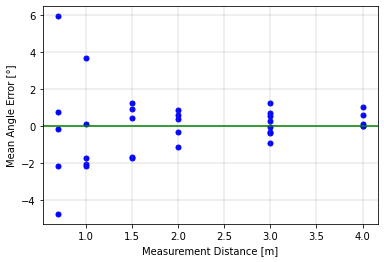

In [316]:
'''AngleError development over Distance'''

cycol = cycle('b')
Error=[]
GTDistance=[]

for Measurement in Data:
    Error.append(Measurement.df["angles-alligned"].mean()-Measurement.GTAngle)
    GTDistance.append(Measurement.GTDist)
plt.scatter(np.asarray(GTDistance), np.asarray(Error), s=25, c='b')

plt.axhline(np.mean(Error), color='g')
print("MeanAngleError " + str(np.mean(Error)))
print("MaxAngleError " + str(np.max(Error)))
print("MinAngleError " + str(np.min(Error)))
plt.ylabel("Mean Angle Error [°]")
plt.xlabel("Measurement Distance [m]")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.savefig('Mean angle error over Distance_lowres.png', dpi=300)

MeanDistanceError 0.01795573240485235
MaxDistanceError 0.44827217470422376
MinDistanceError -0.11987934025201796


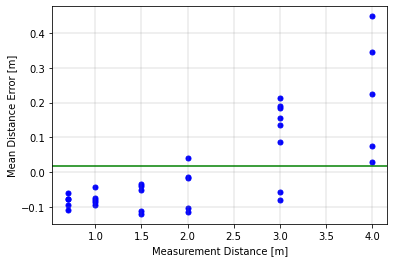

In [298]:
'''DistanceError development over Distance'''

Error=[]
GTDistance=[]
for Measurement in Data:
    Error.append(Measurement.meanDist-Measurement.GTDist)
    GTDistance.append(Measurement.GTDist)
plt.scatter(np.asarray(GTDistance), np.asarray(Error), s=25, c='b')
    
plt.axhline(np.mean(Error), color='g')
print("MeanDistanceError " + str(np.mean(Error)))
print("MaxDistanceError " + str(np.max(Error)))
print("MinDistanceError " + str(np.min(Error)))
plt.ylabel("Mean Distance Error [m]")
plt.xlabel("Measurement Distance [m]")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.savefig('Mean distance error over Distance_lowres.png', dpi=1200)

MeanCartesianError 0.11840009633948058
MaxCartesianError 0.4481698466153911
MinCartesianError 0.026438961599883896


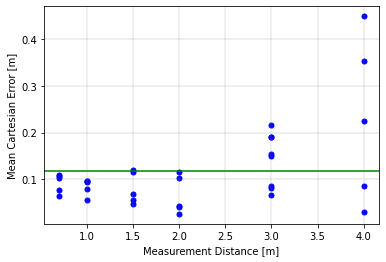

In [315]:
'''CartesianError development over angle'''

Error=[]
GTDistance=[]
for Measurement in Data:
    error=np.sqrt((Measurement.meanXalligned-Measurement.GTx)**2+(Measurement.meanYalligned-Measurement.GTy)**2)
    Error.append(error)
    GTDistance.append(Measurement.GTDist)
plt.scatter(np.asarray(GTDistance), np.asarray(Error), s=25, c='b')
    
plt.axhline(np.mean(Error), color='g')
print("MeanCartesianError " + str(np.mean(Error)))
print("MaxCartesianError " + str(np.max(Error)))
print("MinCartesianError " + str(np.min(Error)))
plt.ylabel("Mean Cartesian Error [m]")
plt.xlabel("Measurement Distance [m]")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.savefig('Mean cartesian error over Distance compensated_lowres.png', dpi=300)

MeanFrequencyError 20.111922396002083
MaxFrequencyError 20.504671764480232
MinFrequencyError 19.147089897480313


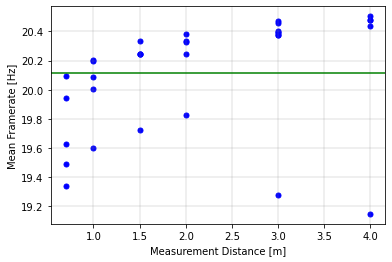

In [302]:
cycol = cycle('b')

Frequency=[]
GTDistance=[]
for Measurement in Data:
    Frequency.append(Measurement.meanHz)
    GTDistance.append(Measurement.GTDist)

plt.scatter(np.asarray(GTDistance), np.asarray(Frequency), s=25, c='b')
    
plt.axhline(np.mean(Frequency), color='g')
print("MeanFrequencyError " + str(np.mean(Frequency)))
print("MaxFrequencyError " + str(np.max(Frequency)))
print("MinFrequencyError " + str(np.min(Frequency)))
plt.ylabel("Mean Framerate [Hz]")
plt.xlabel("Measurement Distance [m]")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.savefig('Framerate_lowres.png', dpi=300)

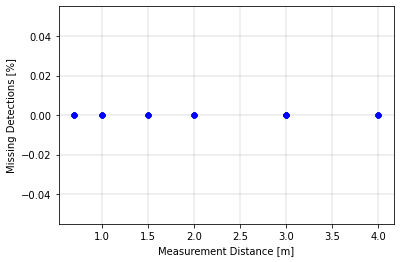

In [301]:
'''Missing Detections over Distance'''

cycol = cycle('b')

for Measurement in Data:
    ax1=plt.plot(Measurement.GTDist,Measurement.missingAmount, marker="o", markersize=5, color=next(cycol),label=str(Measurement.GTDist))
plt.ylabel("Missing Detections [%]")
plt.xlabel("Measurement Distance [m]")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.savefig('Missing detections over distance_lowres.png', dpi=300)